# HR ANALYTICS

https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train['type']='train'
test['type']='test'

In [5]:
data=pd.concat([train,test],ignore_index=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
KPIs_met >80%           78298 non-null int64
age                     78298 non-null int64
avg_training_score      78298 non-null int64
awards_won?             78298 non-null int64
department              78298 non-null object
education               74855 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null object
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
type                    78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.0+ MB


In [7]:
data.isnull().sum()

KPIs_met >80%               0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                3443
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
type                        0
dtype: int64

In [8]:
import statistics as st
mode=st.mode(data['education'])
data['education']=data['education'].fillna(mode)

In [9]:
mode1=st.mode(data['previous_year_rating'])
data['previous_year_rating']=data['previous_year_rating'].fillna(mode1)

In [10]:
data.isnull().sum()

KPIs_met >80%               0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                   0
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating        0
recruitment_channel         0
region                      0
type                        0
dtype: int64

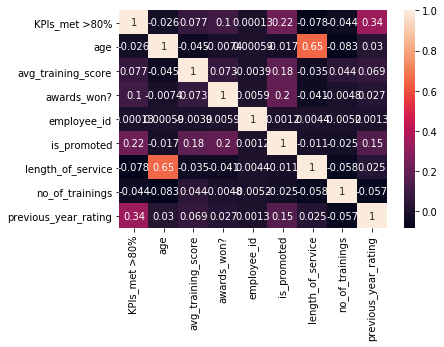

In [11]:
sns.heatmap(data.corr(),annot=True)

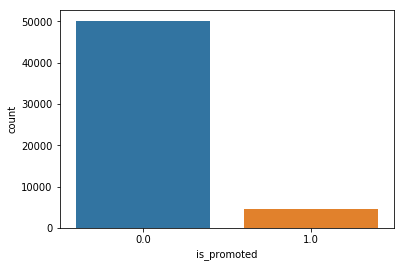

In [12]:
sns.countplot(data['is_promoted'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['department']=le.fit_transform(data['department'])

In [14]:
data['region']=le.fit_transform(data['region'])

In [15]:
data['education']=le.fit_transform(data['education'])

In [16]:
data['gender']=le.fit_transform(data['gender'])

In [17]:
data['recruitment_channel']=le.fit_transform(data['recruitment_channel'])

In [18]:
data.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,type
0,1,35,49,0,7,2,65438,0,0.0,8,1,5.0,2,31,train
1,0,30,60,0,4,0,65141,1,0.0,4,1,5.0,0,14,train
2,0,34,50,0,7,0,7513,1,0.0,7,1,3.0,2,10,train
3,0,39,50,0,7,0,2542,1,0.0,10,2,1.0,0,15,train
4,0,45,73,0,8,0,48945,1,0.0,2,1,3.0,0,18,train


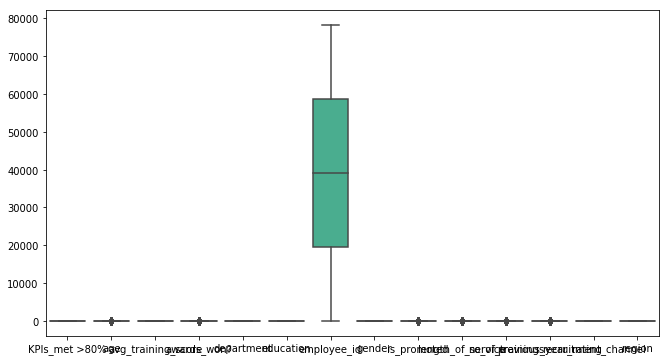

In [19]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)

In [30]:
#Divide into test and train:
train = data.loc[data['type']=='train']
test = data.loc[data['type']=='test']

In [31]:
train=train.drop(['type','employee_id'],axis=1)
test=test.drop(['is_promoted','employee_id','type'],axis=1)

In [32]:
X_train=train.drop('is_promoted',axis=1)
y_train=train['is_promoted']
X_test=test

In [25]:
pip install -U imbalanced-learn

  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\adity\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [34]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train,Y_train=smt.fit_sample(X_train,y_train.ravel())

### WHICH CLASSIFICATION ALGORITHM TO USE ????

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
x=train.drop('is_promoted', axis=1)
y=train['is_promoted']
cv=StratifiedKFold(n_splits=5,random_state=5)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ( max_iter=1000)))
results = []
names = []
table=[]
for name, model in models:
    accuracy=cross_val_score(model, x, y,cv=cv)
    results.append(accuracy)
    names.append(name)
    achieved_acc = "%s: %f" % (name, accuracy.mean())
    table.append(achieved_acc)
table

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

['CART: 0.895946',
 'KNN: 0.923752',
 'Naive Bayes: 0.912750',
 'SVM: 0.926945',
 'Random Forest: 0.930284',
 'Bagging: 0.932674',
 'AdaBoost: 0.922767',
 'Gradient Boosting: 0.937162',
 'Logistic Regression: 0.917038',
 'MLP: 0.929189']

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier( 
criterion = "entropy", random_state = 0, 
max_depth = 10, min_samples_leaf = 1, min_samples_split=2 ,splitter='best') 
# Performing training 
clf_entropy.fit(X_train, y_train) 
#Prediction
y_pred1 = clf_entropy.predict(X_test) 

ValueError: Number of labels=54808 does not match number of samples=100280

In [26]:
clf_entropy.score(X_train,y_train)

0.9420340096336302

In [27]:
d=pd.read_csv('test.csv')
a=d['employee_id']

In [28]:
b=y_pred1

In [29]:
sub1=pd.DataFrame({'employee_id':a,'is_promoted':b})

In [30]:
sub1['is_promoted']=sub1['is_promoted'].astype(int)

In [31]:
sub1.to_csv('submission1.csv',index=False)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train, y_train)
y_pred5=model.predict(X_test)
b1=y_pred5
sub2=pd.DataFrame({'employee_id':d['employee_id'],'is_promoted':b1})
sub2['is_promoted']=sub2['is_promoted'].astype(int)
sub2.to_csv('submission2.csv',index=False)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [100280, 54808]

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [34]:
ens=pd.DataFrame({'Dtree':y_pred1,'LReg':y_pred5,'KNN':prediction})
ens.head()

,Dtree,LReg,KNN
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,1.0


In [60]:
l=[]
for i in range(0,len(y_pred1)):
    if(y_pred1[i]==y_pred5[i] and y_pred5[i]==prediction[i]):
        l.append(y_pred1[i])
    elif(y_pred1[i]==y_pred5[i] and y_pred5[i]!=prediction[i]):
        l.append(y_pred5[i])
    elif(y_pred1[i]!=y_pred5[i] and y_pred5[i]==prediction[i]):
        l.append(prediction[i])
    elif(y_pred1[i]!=y_pred5[i] and y_pred5[i]!=prediction[i]):
        l.append(prediction[i])

In [63]:
ens['Final_Pred']=l

In [65]:
ens.head()

,Dtree,LReg,KNN,Final_Pred
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [66]:
sub5=pd.DataFrame({'employee_id':d['employee_id'],'is_promoted':ens['Final_Pred']})
sub5['is_promoted']=sub5['is_promoted'].astype(int)
sub5.to_csv('submissionF.csv',index=False)